In [ ]:
#In this, we will predict heart diseases using available features

In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
df.head()

#importing dataset

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


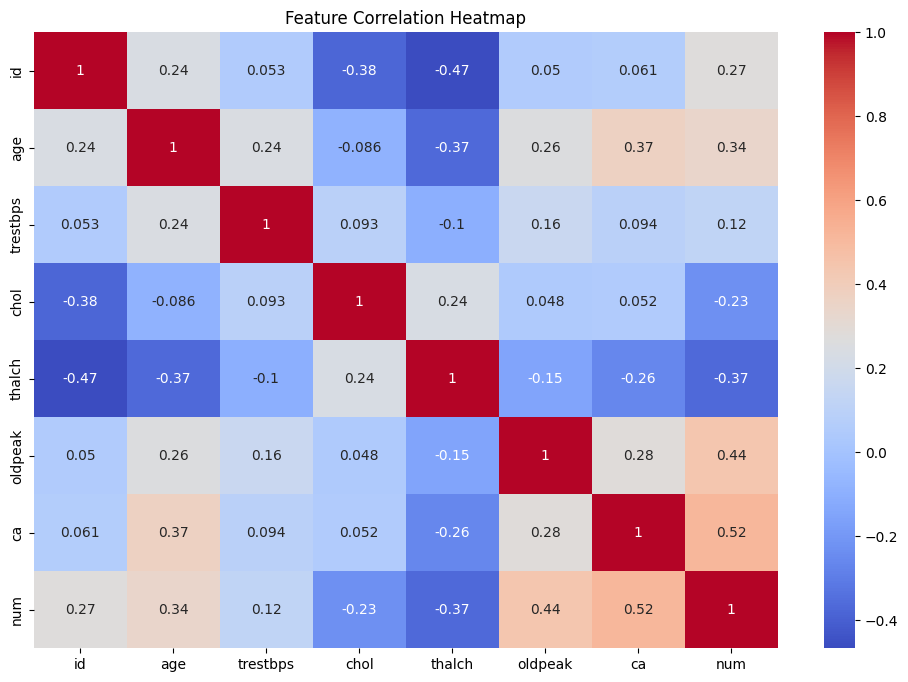

In [6]:
# EDA
numeric_df = df.select_dtypes(include=['int64', 'float64'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [8]:
print(df.columns)


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [9]:
# creating new column


df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

X = df.drop(['num', 'target', 'id', 'dataset'], axis=1)
y = df['target']


In [10]:
#feature scaling

X = df.drop('target', axis=1)
y = df['target']


In [17]:
#encoding

from sklearn.preprocessing import LabelEncoder


X_encoded = X.copy()


cat_cols = X_encoded.select_dtypes(include=['object']).columns


le = LabelEncoder()
for col in cat_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)  # Use encoded version


X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)


In [20]:
#filling null values

from sklearn.impute import SimpleImputer


# Fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# Scale after imputing
X_scaled = scaler.fit_transform(X_imputed)


In [21]:
#training and testing model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00       109

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



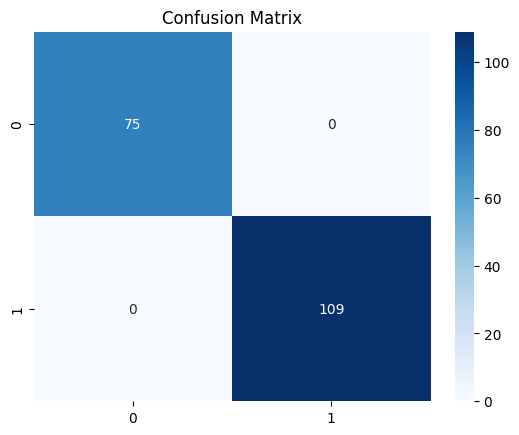

In [22]:
#evaluation

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


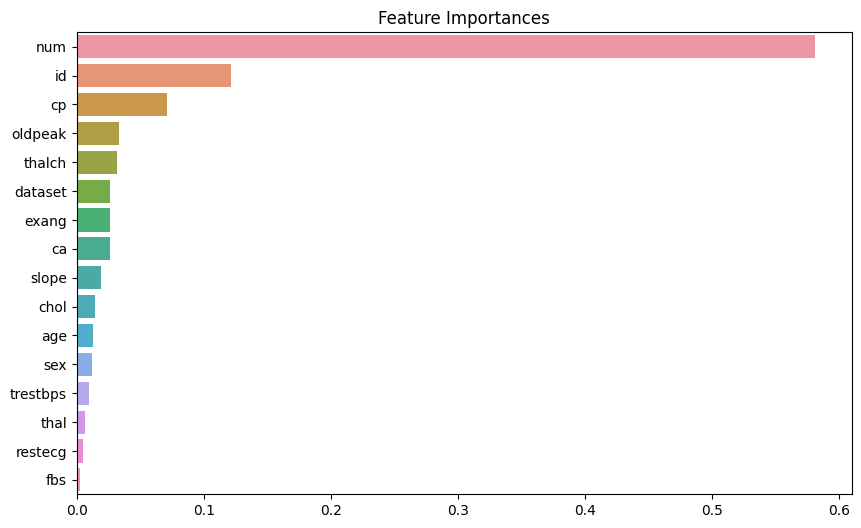

In [23]:
#feature importance

importances = model.feature_importances_
features = df.columns[:-1]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances')
plt.show()
